In [142]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# Read in the data
df = pd.read_csv("Credit.csv", index_col=0)

# Display the first few rows of the dataset
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [143]:
# Part a) Predicting whether a person has an income greater than 50

# Create HighIncome indicator variable
df["HighIncome"] = (df["Income"] > 50).astype(int)

# Remove the Income variable
df = df.drop("Income", axis=1)

# Prepare features X and labels y for Part a)
X_a = df.drop(["HighIncome"], axis=1)
y_a = df["HighIncome"]

# One-hot encode categorical variables
X_a_encoded = pd.get_dummies(X_a, drop_first=True)

In [144]:
# Define models to evaluate with scaling included in a pipeline
models = []
models.append(
    (
        "Logistic Regression",
        Pipeline(
            [
                ("scaler", StandardScaler()),
                (
                    "classifier",
                    LogisticRegression(
                        max_iter=1000
                    ),
                ),
            ]
        ),
    )
)
models.append(("KNN (k=1)", KNeighborsClassifier(n_neighbors=1)))
models.append(("KNN (k=5)", KNeighborsClassifier(n_neighbors=5)))
models.append(("KNN (k=10)", KNeighborsClassifier(n_neighbors=10)))
models.append(("Decision Tree", DecisionTreeClassifier()))
models.append(("Decision Tree (depth=3)", DecisionTreeClassifier(max_depth=3)))
models.append(
    ("Random Forest", RandomForestClassifier(n_estimators=100, class_weight="balanced"))
)

In [145]:
# Evaluate models for Part a)
results_a = []
names = []
scoring = "accuracy"
seed = 42069
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)

print("Evaluating models for Part a) - Predicting HighIncome\n")
for name, model in models:
    cv_results = cross_val_score(model, X_a_encoded, y_a, cv=kfold, scoring=scoring)
    results_a.append(cv_results)
    names.append(name)
    msg = "%s: mean accuracy = %f (std = %f)" % (
        name,
        cv_results.mean(),
        cv_results.std(),
    )
    print(msg)

Evaluating models for Part a) - Predicting HighIncome

Logistic Regression: mean accuracy = 0.945000 (std = 0.021794)
KNN (k=1): mean accuracy = 0.935000 (std = 0.025495)
KNN (k=5): mean accuracy = 0.932500 (std = 0.022500)
KNN (k=10): mean accuracy = 0.917500 (std = 0.037165)
Decision Tree: mean accuracy = 0.907500 (std = 0.033634)
Decision Tree (depth=3): mean accuracy = 0.882500 (std = 0.058149)
Random Forest: mean accuracy = 0.897500 (std = 0.043946)


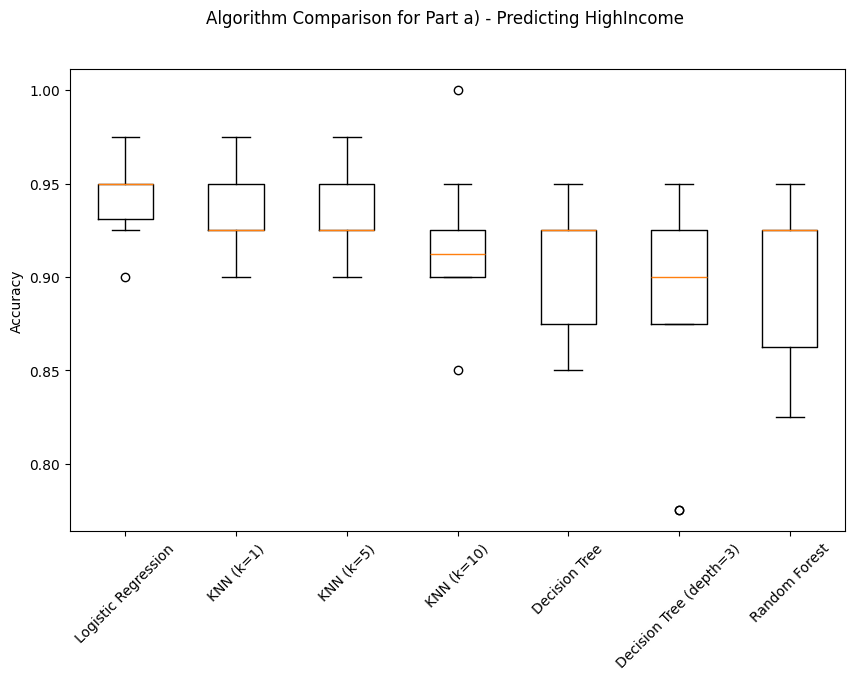

In [146]:
# Boxplot for Part a)
fig = plt.figure(figsize=(10, 6))
fig.suptitle("Algorithm Comparison for Part a) - Predicting HighIncome")
ax = fig.add_subplot(111)
plt.boxplot(results_a)
ax.set_xticklabels(names, rotation=45)
plt.ylabel("Accuracy")
plt.show()

In [147]:
# Evaluate models for Part b)
df = pd.read_csv("Credit.csv", index_col=0)

# Prepare features X and labels y for Part b)
X_b = df.drop(["Cards"], axis=1)
y_b = df["Cards"]

print(y_b.value_counts())

# One-hot encode categorical variables
X_b_encoded = pd.get_dummies(X_b, drop_first=True)

Cards
2    115
3    111
4     72
1     51
5     34
6     11
7      4
8      1
9      1
Name: count, dtype: int64


In [148]:
results_b = []

print("\nEvaluating models for Part b) - Predicting Number of Credit Cards\n")
for name, model in models:
    cv_results = cross_val_score(
        model, X_b_encoded, y_b, cv=kfold, scoring=scoring
    )
    results_b.append(cv_results)
    msg = "%s: mean accuracy = %f (std = %f)" % (
        name,
        cv_results.mean(),
        cv_results.std(),
    )
    print(msg)


Evaluating models for Part b) - Predicting Number of Credit Cards

Logistic Regression: mean accuracy = 0.265000 (std = 0.061441)
KNN (k=1): mean accuracy = 0.212500 (std = 0.064469)
KNN (k=5): mean accuracy = 0.237500 (std = 0.047762)
KNN (k=10): mean accuracy = 0.257500 (std = 0.077500)
Decision Tree: mean accuracy = 0.242500 (std = 0.064275)
Decision Tree (depth=3): mean accuracy = 0.235000 (std = 0.066332)
Random Forest: mean accuracy = 0.277500 (std = 0.056403)


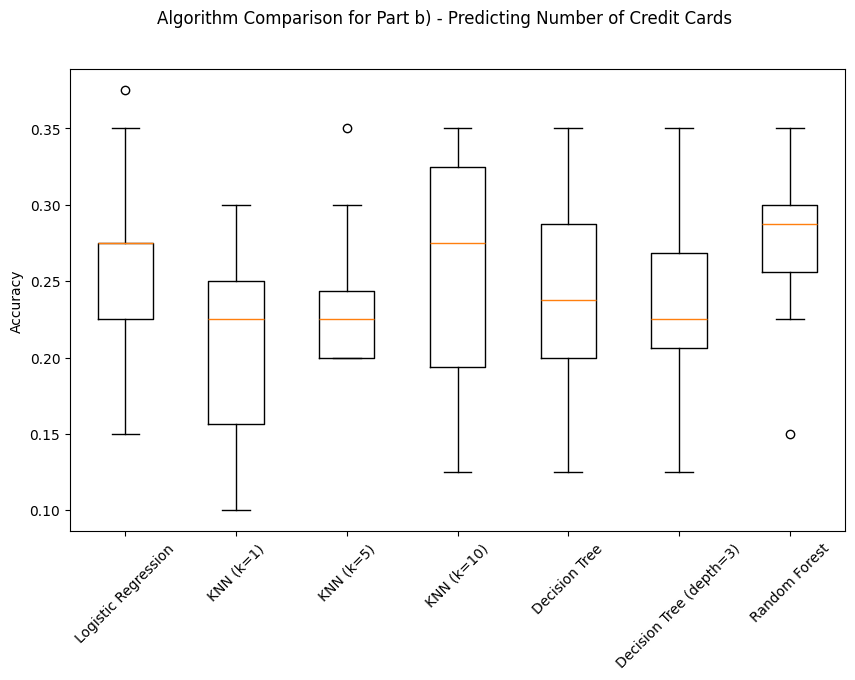

In [149]:
# Boxplot for Part b)
fig = plt.figure(figsize=(10, 6))
fig.suptitle("Algorithm Comparison for Part b) - Predicting Number of Credit Cards")
ax = fig.add_subplot(111)
plt.boxplot(results_b)
ax.set_xticklabels(names, rotation=45)
plt.ylabel("Accuracy")
plt.show()

Cards
2    115
3    111
4     72
1     51
5     34
6     11
7      4
8      1
9      1
Name: count, dtype: int64


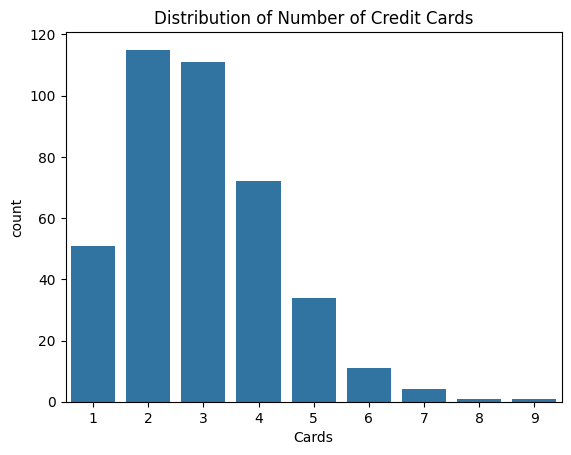

In [151]:
print(df["Cards"].value_counts())

# Visualize the distribution
sns.countplot(x="Cards", data=df)
plt.title("Distribution of Number of Credit Cards")
plt.show()

In [ ]:
df = pd.read_csv("Credit.csv", index_col=0)

# Combine classes with counts less than a threshold into a single class '6+'
threshold = 20
counts = df["Cards"].value_counts()
df["Cards_Grouped"] = df["Cards"].apply(
    lambda x: x if counts[x] >= threshold else "6+"
)

# Check the new class distribution
print(df["Cards_Grouped"].value_counts())

# Prepare features X and labels y for Part b)
X_b = df.drop(["Cards"], axis=1)
y_b = df["Cards"]

# One-hot encode categorical variables
X_b_encoded = pd.get_dummies(X_b, drop_first=True)

Cards_Grouped
2     115
3     111
4      72
1      51
5      34
6+     17
Name: count, dtype: int64
Cards
2    115
3    111
4     72
1     51
5     34
6     11
7      4
8      1
9      1
Name: count, dtype: int64


In [ ]:
results_b = []

print("\nEvaluating models for Part b) - Predicting Number of Credit Cards\n")
for name, model in models:
    cv_results = cross_val_score(model, X_b_encoded, y_b, cv=kfold, scoring=scoring)
    results_b.append(cv_results)
    msg = "%s: mean accuracy = %f (std = %f)" % (
        name,
        cv_results.mean(),
        cv_results.std(),
    )
    print(msg)